In [1]:
import sys
sys.path.append("../../")

# GaussianProcess

In [2]:
from neuralprocesses.utils.gp import GaussianProcess
from neuralprocesses.utils.gp import squared_exponential_kernel

import tensorflow as tf

## Basic examples

Choose the x-coordinates.

In [3]:
x = tf.constant([list(range(50))], dtype=tf.float32)

Setup a Gaussian process with a squared-exponential kernel of correlation length 10.

In [4]:
gp = GaussianProcess(squared_exponential_kernel(x, 10.))

Compute a sample of y-values and stack them with the x-values.

In [5]:
f = tf.transpose(tf.reshape(tf.stack([x, gp.sample]), (2, -1)))

Run this Tensorflow graph and print the first few rows of the result.

In [6]:
with tf.Session() as session:
    result = session.run(f)

print(result[:5, :])

[[0.         0.5660056 ]
 [1.         0.6096961 ]
 [2.         0.6442348 ]
 [3.         0.70504975]
 [4.         0.78366244]]


Plot the function that we just sampled from the GP.

In [7]:
from neuralprocesses.utils.plotting import list_plot

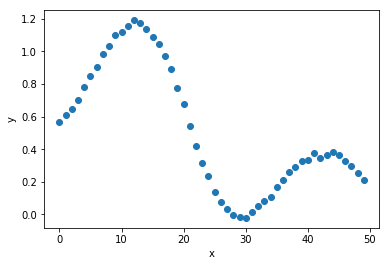

In [8]:
list_plot(result, axes_label=("x", "y"))